# k-means

In [1]:
from sklearn import datasets as ds
from matplotlib import pyplot as plt
import numpy as np

In [2]:
iris = ds.load_iris()
X, y = iris.data, iris.target
X.shape, y.shape

((150, 4), (150,))

In [3]:
X = X[y<2]
X = X[:, [0, 2]]
X[:5, :]

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4]])

In [4]:
X.shape

(100, 2)

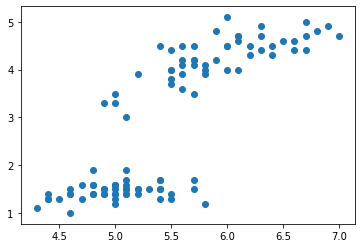

In [5]:
fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1])

plt.show()

In [6]:
from sklearn.cluster import KMeans

In [7]:
#n_clusters=3
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

In [8]:
kmeans.cluster_centers_

array([[5.55555556, 3.94074074],
       [5.006     , 1.462     ],
       [6.3826087 , 4.63478261]])

In [9]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2,
       0, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 2,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0], dtype=int32)

In [10]:
kmeans.cluster_centers_[:, 0]

array([5.55555556, 5.006     , 6.3826087 ])

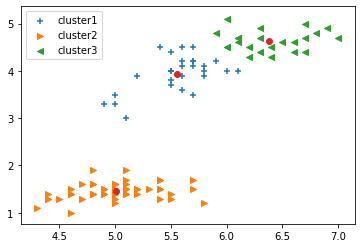

In [16]:
fig, ax = plt.subplots()
ax.scatter(X[kmeans.labels_ == 0, 0], X[kmeans.labels_ == 0, 1], marker="+", label="cluster1")
ax.scatter(X[kmeans.labels_ == 1, 0], X[kmeans.labels_ == 1, 1], marker=">", label="cluster2")
ax.scatter(X[kmeans.labels_ == 2, 0], X[kmeans.labels_ == 2, 1], marker="<", label="cluster3")
ax.legend()

ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker="o")
plt.show()

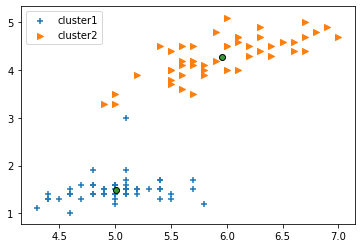

In [15]:
#n_clusters=2
kmeans02 = KMeans(n_clusters=2, random_state=0).fit(X)

fig, ax = plt.subplots()
ax.scatter(X[kmeans02.labels_ == 0, 0], X[kmeans02.labels_ == 0, 1], marker="+", label="cluster1")
ax.scatter(X[kmeans02.labels_ == 1, 0], X[kmeans02.labels_ == 1, 1], marker=">", label="cluster2")
ax.legend()

ax.scatter(kmeans02.cluster_centers_[:, 0], kmeans02.cluster_centers_[:, 1], marker="o", edgecolors="k")
plt.show()

# 階層的クラスタリング

In [17]:
from sklearn.cluster import AgglomerativeClustering

In [19]:
clustering = AgglomerativeClustering(n_clusters=3).fit(X)

In [20]:
clustering.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2,
       1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1])

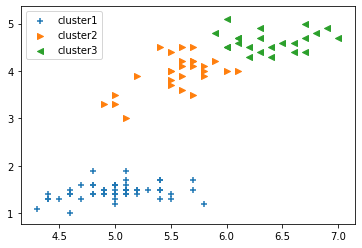

In [21]:
fig, ax = plt.subplots()
ax.scatter(X[clustering.labels_ == 0, 0], X[clustering.labels_ == 0, 1], marker="+", label="cluster1")
ax.scatter(X[clustering.labels_ == 1, 0], X[clustering.labels_ == 1, 1], marker=">", label="cluster2")
ax.scatter(X[clustering.labels_ == 2, 0], X[clustering.labels_ == 2, 1], marker="<", label="cluster3")
ax.legend()

plt.show()

In [26]:
from scipy.cluster.hierarchy import dendrogram

In [30]:
children = clustering.children_
children.shape

(99, 2)

In [29]:
distance = np.arange(children.shape[0])
distance

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98])

In [34]:
no_of_observations = np.arange(2, children.shape[0]+2)
no_of_observations

array([  2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
        15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
        41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100])

In [37]:
linkage_matrix = np.hstack((children, distance[:, np.newaxis], no_of_observations[:, np.newaxis])).astype(float)
linkage_matrix[:5]

array([[ 0., 17.,  0.,  2.],
       [ 1., 37.,  1.,  3.],
       [12., 45.,  2.,  4.],
       [ 6., 47.,  3.,  5.],
       [ 4., 49.,  4.,  6.]])

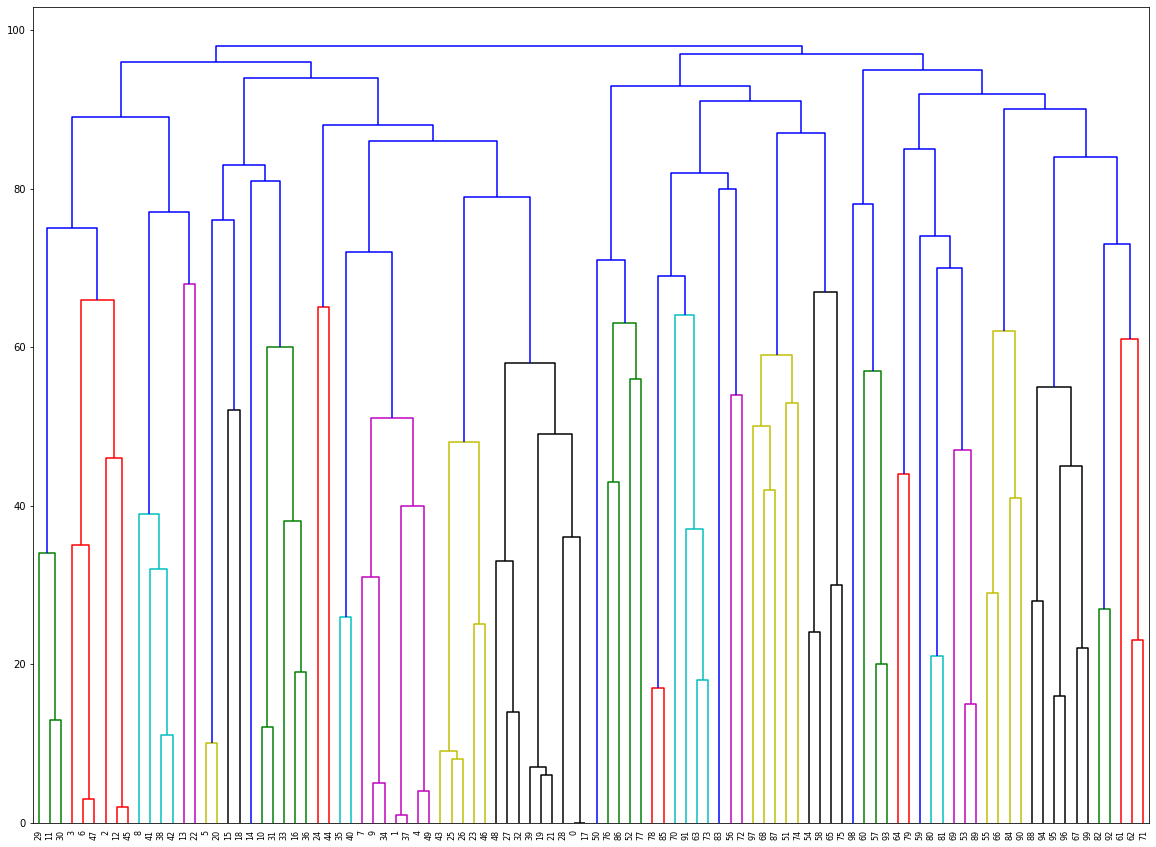

In [38]:
fig, ax = plt.subplots(figsize=(20,15))
dendrogram(linkage_matrix, labels=np.arange(100), leaf_font_size=8)
plt.show()